<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_4_1_(2025)_odds_and_rate_ratios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In the upcoming notebooks we discuss formal modeling methods of a binary response, accomplished most frequently with ***logistic regression***.  To help with interpreting the logistic model we take a look at *odds* and *odds ratios*, as well as *rates* and *rate ratios*.

# Case study

We'll consider the following data set as our case study, which comes from [Wilkinson et al. (2015)](https://www.sciencedirect.com/science/article/pii/S0022098115000039): **Influence of predator identity on the strength of predator avoidance responses in lobsters**, *Journal of Experimental Marine Biology and Ecology*.  The authors were interested in understanding the impact various lobster predators (sea raven, cod, and striped bass) have on lobsters of varying sizes.

<center> 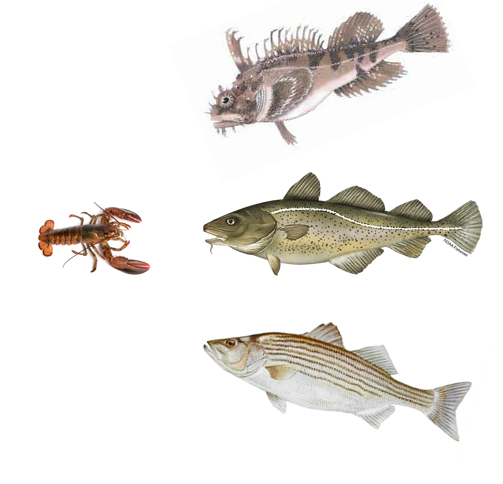 </center>

The lobsters were placed in a holding tank along with one of the predators, with a herring in the middle to "tempt" the lobsters to feed:

<center> <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0022098115000039-gr1.jpg">

<b> Figure 1 from Wilkinson et al. </b>
 </center>


The data contain carapace length (in millimeters) grouped into 3mm brackets, along with the survival status of each lobster.  A binary variable indicating whether the lobster was "large" (41mm or longer) or "small" (40mm or shorter) is also included.

In [2]:
library(dplyr)
lobsters <- read.csv('https://www.dropbox.com/s/kw3px03a6t3s1x3/lobsters.csv?dl=1')
lobsters %>% slice(50:55)

length.mm,size,survival
<int>,<chr>,<int>
36,small,0
36,small,0
36,small,1
36,small,1
36,small,1
36,small,1


The response variable $Y_i$ is the binary survival status of lobster $i$: $Y_i = 1$ if the lobster survived and 0 otherwise.

# Summarizing the size/survival relationship

Consider the relationship between the binary size of the lobster (small/large) and the survival status.  This relationship can be summarized easily in a 2x2 table, and a stacked bar chart:

In [3]:
(crosstab <- xtabs(~size + survival, data = lobsters))

       survival
size     0  1
  large 23 56
  small 57 23

In [4]:
prop.table(crosstab, 1)

       survival
size            0         1
  large 0.2911392 0.7088608
  small 0.7125000 0.2875000

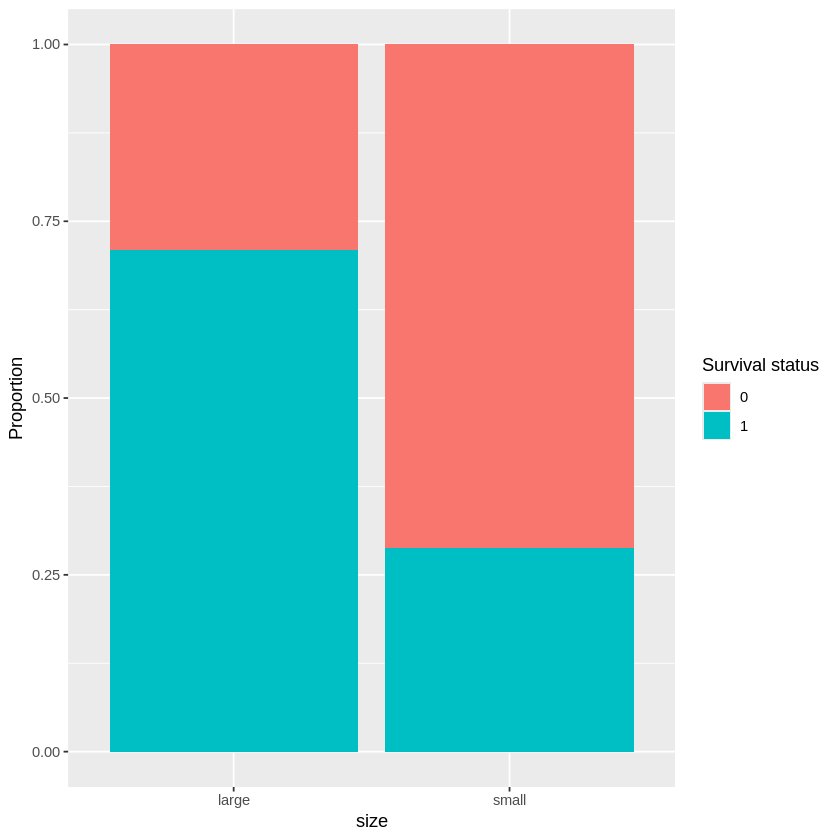

In [5]:
library(ggplot2)
ggplot(data = lobsters) +
  geom_bar(aes(x = size, fill = factor(survival)), position='fill') +
    scale_fill_discrete(name = 'Survival status') + ylab('Proportion')

From these summaries, we see that large lobsters have a much higher survival rate than small ones.  How do we quantify this?

# Probabilities and odds

Consider $\hat p_{L} = 0.7$, the sample percent of large lobsters that survive.  This is our estimate of $P(Y=1 | X = large)$, which is a *probability*.  Our interpretation of this estimate is that out of every 10 large lobsters, 7 survive.  

Another way to compare the survival rate among large lobsters is via the ***odds***. Formally:

$$Odds = \frac{p}{1-p}$$

For our sample, $\widehat{Odds_L} = 0.7/0.3 = 2.3$.  The interpretation of the odds: $~2.3$ large lobsters survive for every large lobster that does not.

Visually:

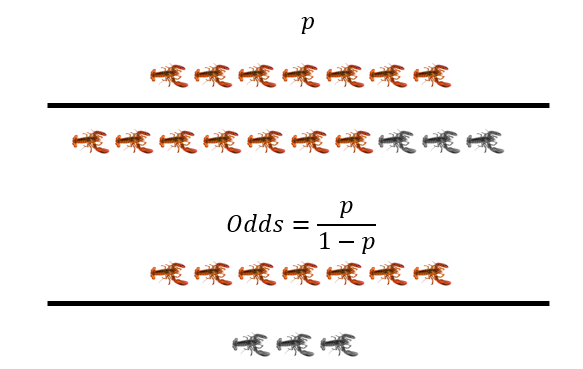

In [6]:
# Odds is basically the ratio.

While $p$, as a probability, is restricted to be $\in [0,1]$, the odds are $\in (0, \infty)$.

# Measuring strength of relationship

Measuring the relationship of a binary $Y$ with a covariate $X$ can be done in two ways:

* Comparing the probabilities, $P(Y=1|X)$
* Comparing the odds, $Odds(Y=1|X)$

This is typically done by taking the *ratio* of the probabilities or odds.  The ratio of the probabilities is often called a *rate ratio*, or sometimes *relative risk* if the $Y=1$ measures something "bad" (like death).  The ratio of the odds is called the *odds ratio*.

## Calculating and interpreting RR

For our lobster example, we have:

* $\hat P(Y=1|X=large) = 0.71$
* $\hat P(Y=1|X=small) = 0.29$

$$\mbox{Rate ratio} = \frac{0.71}{0.29} = 2.45$$

Interpretation of $RR$ when $RR > 1$:

***The survival rate for large lobsters is 2.45 times higher than the survival rate for small lobsters.***

There's no reason we couldn't have the survival rate for small lobsters in the numerator, in which case:


$$\mbox{Rate ratio} = \frac{0.29}{0.71} = 0.41$$

Interpretation of $RR$ when $RR < 1$:

***The survival rate for small lobsters is 41% as high as the survival rate for large lobsters.***



## Calculating and interpreting OR

For our lobster example, we have:

* $\widehat{Odds}(Y=1|X=large) = 2.43$
* $\widehat{Odds}(Y=1|X=small) = 0.40$

$$\mbox{Odds ratio} = \frac{2.43}{0.40} = 6.1$$

Interpretation of $OR$ when $OR > 1$:


***The odds of survival for large lobsters are 6.1 times higher than the odds of survival for small lobsters.***

If we compute the odds ratio the other way:


$$\mbox{Odds ratio} = \frac{0.40}{2.43} = 0.16$$

Interpretation of $OR$ when $OR < 1$:

***The odds of survival for small lobsters are 16% as high as the odds of survival for large lobsters.***



## Features of RR and OR

* If there is no relationship between $Y$ and $X$, both $RR$ and $OR$ equal 1.
* $OR$ will always be more extreme (further from 1, on either side) than the $RR$.